# ACM Research Week 3: Logistic Regression and Classification

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ACM-Research/image-classification-cnn/blob/master/week3/LogisticRegression_Incomplete.ipynb)

- We can extend our linear regression model to support classification tasks
- We do this with a slightly different hypothesis and cost functions

## Logistic Regression: Functions
### Hypothesis Function
#### Sigmoid
First, let's define $\sigma(x)$:

$$\sigma(x) = \frac{1}{1+ e^{-x}},\: x \in \mathbb{R}$$

This function is useful because it takes the entire real number space and compresses it down to a value between 0 and 1, which we can assign as the probability for a specific class in the classification task.

#### Defining the Hypothesis
Using this, we can define our hypothesis function $h(X) = \hat{y} = \sigma(Xw)$, where $w$ is a $n + 1$ dimensional vector of weights and $X$ is the design matrix.

What does this hypothesis mean? $\hat y$ represents the _probability_ that a given point matches the given class. For example, $P(x = \text{car}) = \sigma(x_1 w)$ tells you the probability that the point $x_1$ is a car.

Thus, if you wanted to train a model to recognize multiple classes, you'd need to find multiple functions $h$, one for each class.

### Cost Function
#### Why Our Existing Cost Function Won't Work
As you recall, the cost function is a way for the model to evaluate its performance. Additionally, the gradient of the cost function gives us an iterative improvement for the model's weights. Therefore, it's really important to pick the right cost function.

The existing cost function only helps us fit a line in $n$ dimensions rather than a boundary between different classes.

#### Conditional Cross-Entropy
This cost function can be defined as $$J(w) = - \sum_i \left(y^{(i)} \log( \hat{y}^{(i)} ) + (1 - y^{(i)}) \log( 1 - \hat{y}^{(i)} ) \right)$$

The gradient of this function will be similar to the one for linear regression: $$\nabla J(w) = \frac{1}{m} X^{\top}(\sigma(Xw) - y)$$

#### How to Implement Conditional Cross-Entropy
The nice, vectorized implementation of this formula is:

$$ J(w) = - \sum \left(y \odot \log \hat{y}  + (1 - y) \odot \log( 1 - \hat{y} ) \right) $$

where $\odot$ is elementwise multiplication.

## Logistic Regression: Implementation
Using the code from last week as a basis:

In [1]:
import math
import numpy as np

# Helper function
def add_column_of_ones(arr):
  m = arr.shape[0]
  ones = np.zeros((m,1)) + 1
  return np.c_[ones, arr]

# Sigmoid function
def sigmoid(x):
    return 0

# Let's define a function predict which outputs matrix of predictions given X
def predict(x_values, weights, is_design_matrix = True):
  X = x_values
  if not is_design_matrix:
    # Add column of 1s to numpy array
    X = add_column_of_ones(X)
  return np.squeeze(sigmoid(np.dot(X, w)))

# Let's then define the cost function J(w)
def cost(pred, actual):
  return 0

# Now, let's define the gradient of the cost function:
def grad_cost(x_values, weights, actual, is_design_matrix = True):
  X = x_values
  m = X.shape[0]
  if not is_design_matrix:
    # Add column of 1s to numpy array
    X = add_column_of_ones(X)
  # Xw - y term
  pred_diff = predict(X, weights) - actual
  return (1/m) * np.dot(X.T, pred_diff)

# Weight update rule
def update_weights(alpha, weights, grad):
  return weights - (alpha * grad)

## Logistic Regression: Training a Classifier

[UCI Divorce Predictors Dataset](https://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set)

TW: Divorce, family issues

### Step 1: Pull in Data

### Step 2: Initialize Weights

### Step 3: Run Gradient Descent

### Step 4: Test on New Data

### Step 5: Report Results

## Multi-class Classification?

Requires $n$ different logistic regression models, one for each class (output category). Find one with max output value.

**Optional Exercise:** Implement this in Python.

## A Short Intro To Image Data

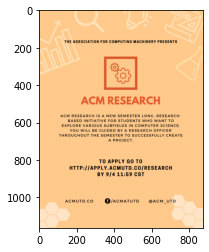

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('images/sample.png')
plt.imshow(img)
plt.show()

In [3]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('images/sample.png')
img_arr_color = img_to_array(img)
print(f'Color size: {img_arr_color.shape}')
img_gray = load_img('images/sample.png', grayscale=True)
img_arr_gray = img_to_array(img_gray)
print(f'Grayscale size: {img_arr_gray.shape}')

Color size: (1164, 875, 3)
Grayscale size: (1164, 875, 1)


In [4]:
img_arr_color[0, :10]

array([[255., 201., 139.],
       [255., 201., 139.],
       [255., 201., 139.],
       [255., 201., 139.],
       [255., 201., 139.],
       [255., 201., 139.],
       [255., 201., 139.],
       [255., 201., 139.],
       [255., 201., 139.],
       [255., 201., 139.]], dtype=float32)

In [5]:
img_arr_gray[0, :10]

array([[210.],
       [210.],
       [210.],
       [210.],
       [210.],
       [210.],
       [210.],
       [210.],
       [210.],
       [210.]], dtype=float32)